Practical 6 : Transfer Learning on suitable Dataset

In [2]:
# import statements 
import tensorflow as tf  
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

In [3]:
# Download and extract dataset
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
filename = "cats_and_dogs_filetred_zip" # just filename 

cached_file_path = tf.keras.utils.get_file(filename, url, cache_dir=os.getcwd()) # specify cache_dir and get the path 

# USe the cached file path instead of just the filename
with zipfile.ZipFile(cached_file_path, "r") as zip_ref:
    zip_ref.extractall()
    


In [4]:
#Define data generators 
train_dir = os.path.join(os.getcwd(), "cats_and_dogs_filtered","train") 
validation_dir = os.path.join(os.getcwd(), 
"cats_and_dogs_filtered","validation") 

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   rotation_range = 20, 
                                   width_shift_range = 0.2, 
                                   height_shift_range = 0.2, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True) 

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                   target_size = (150,150), 
                                                   batch_size = 20, 
                                                   class_mode = "binary")

validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                              target_size = (150,150), 
                                                              batch_size = 20, 
                                                              class_mode = "binary" 
                                                              )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
# Load pre - trained VGG16 model 
conv_base = VGG16(weights = "imagenet", 
                  include_top = False, 
                  input_shape = (150,150,3))

In [6]:
#Freeze convolutional base layers 
conv_base.trainable = False

In [7]:
#Build model on top of the convolutional base 
model = tf.keras.models.Sequential() 
model.add(conv_base) 
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(256,activation = "relu")) 
model.add(tf.keras.layers.Dropout(0.5)) 
model.add(tf.keras.layers.Dense(1,activation = "sigmoid"))


In [8]:
#Compile model 
model.compile(loss = "binary_crossentropy", 
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 2e-5), 
              metrics = ["accuracy"])

In [10]:
#Train model 
history = model.fit(train_generator, 
                    steps_per_epoch = 5, 
                    epochs = 5, 
                    validation_data = validation_generator, 
                    validation_steps = 10)

Epoch 1/5
5/5 [==============================] - 41s 10s/step - loss: 0.6584 - accuracy: 0.6300 - val_loss: 0.6119 - val_accuracy: 0.7110
Epoch 2/5
5/5 [==============================] - 40s 10s/step - loss: 0.6613 - accuracy: 0.5500 - val_loss: 0.6057 - val_accuracy: 0.7160
Epoch 3/5
5/5 [==============================] - 40s 10s/step - loss: 0.7031 - accuracy: 0.5700 - val_loss: 0.5949 - val_accuracy: 0.7340
Epoch 4/5
5/5 [==============================] - 40s 10s/step - loss: 0.7980 - accuracy: 0.5100 - val_loss: 0.5952 - val_accuracy: 0.7200
Epoch 5/5
5/5 [==============================] - 40s 10s/step - loss: 0.6344 - accuracy: 0.6300 - val_loss: 0.5807 - val_accuracy: 0.7540


In [11]:
#Show sample input and its predicted class 
x, y_true = next(validation_generator) 
y_pred = model.predict(x) 
class_names = ['cat','dog'] 


1/1 [==============================] - 1s 700ms/step


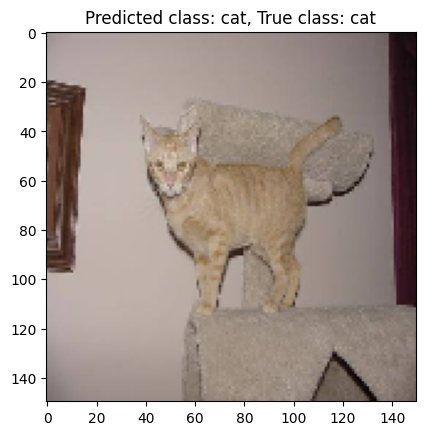

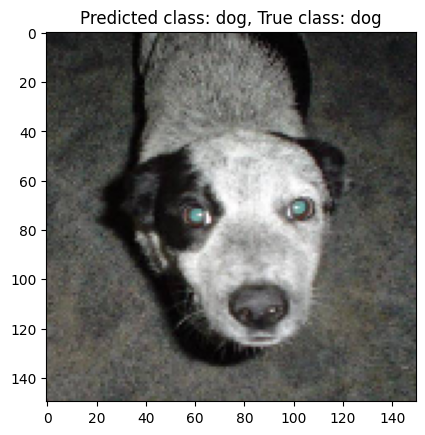

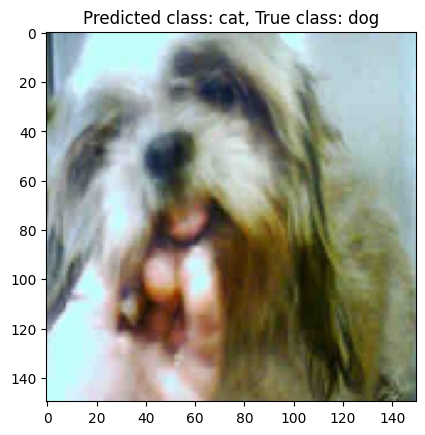

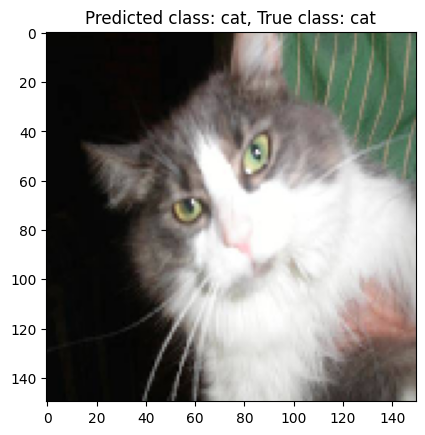

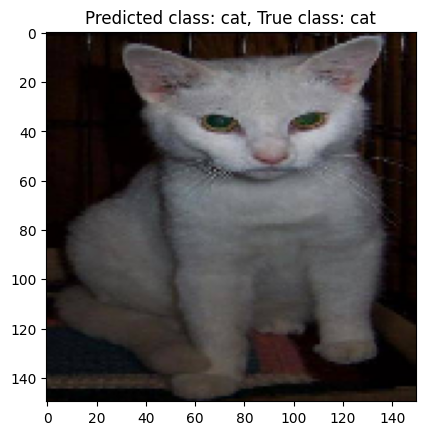

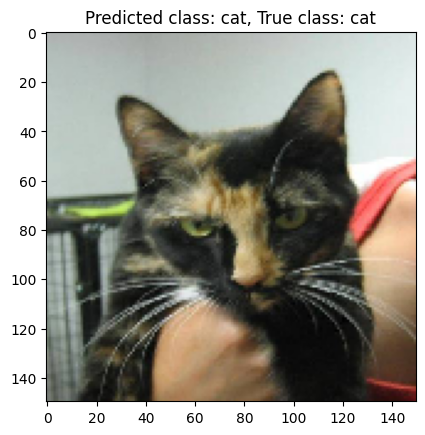

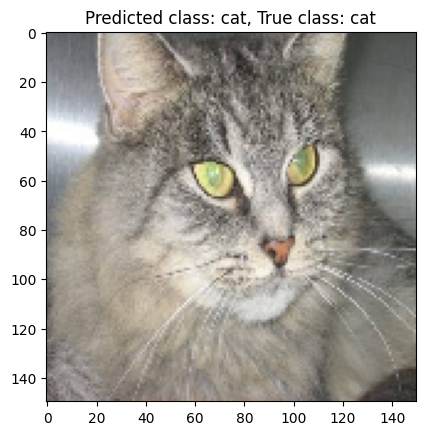

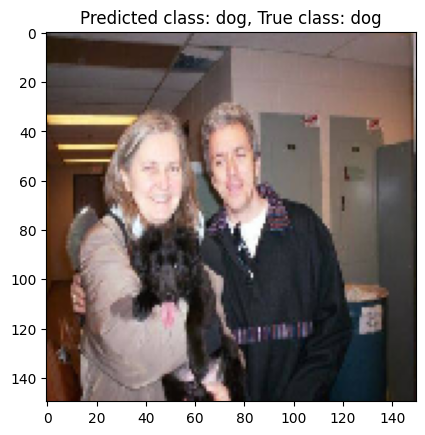

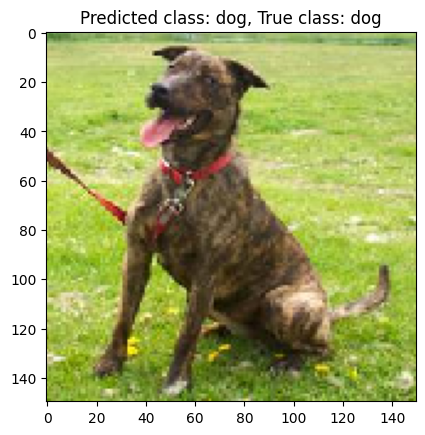

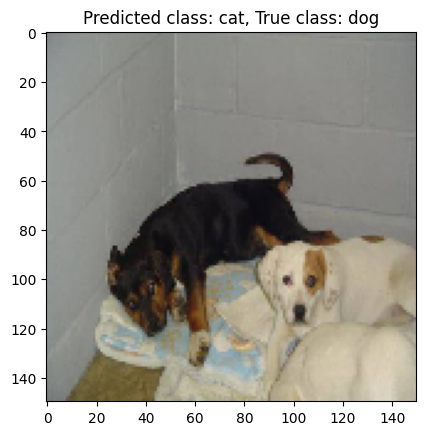

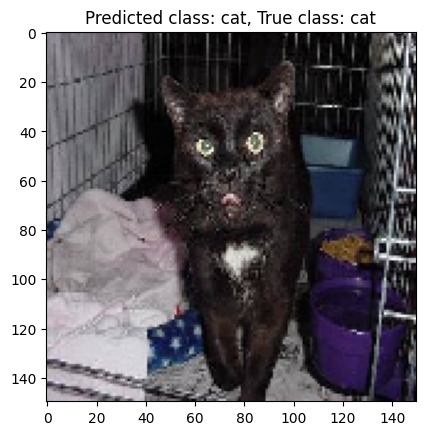

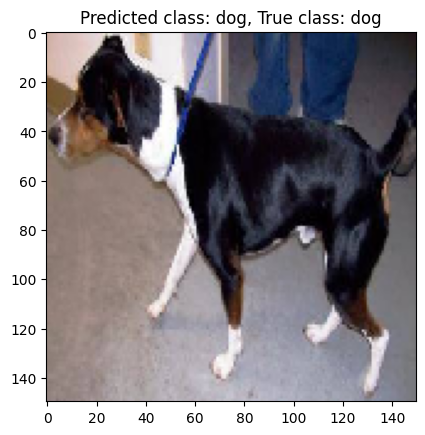

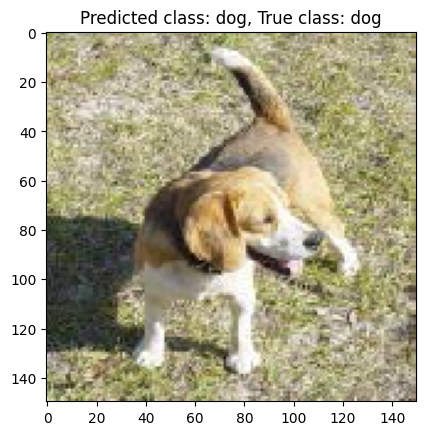

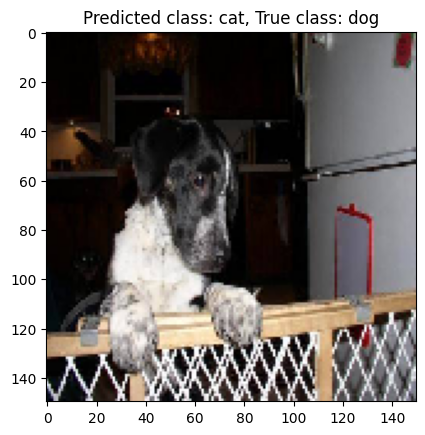

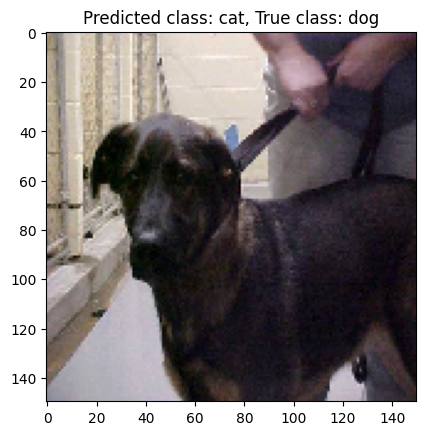

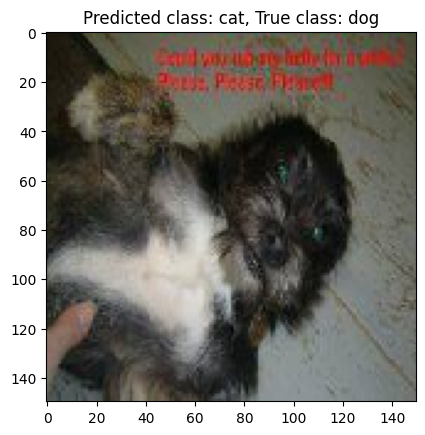

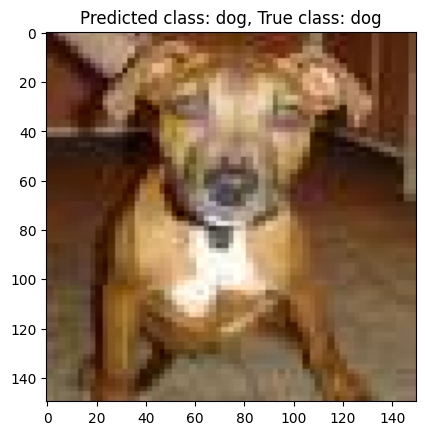

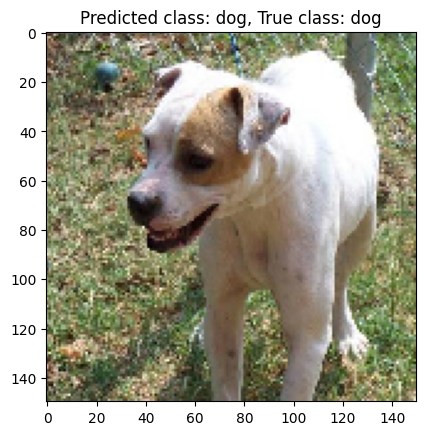

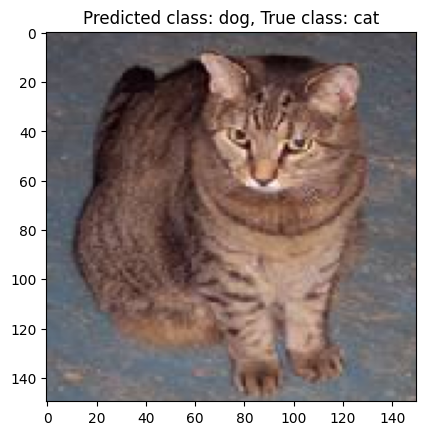

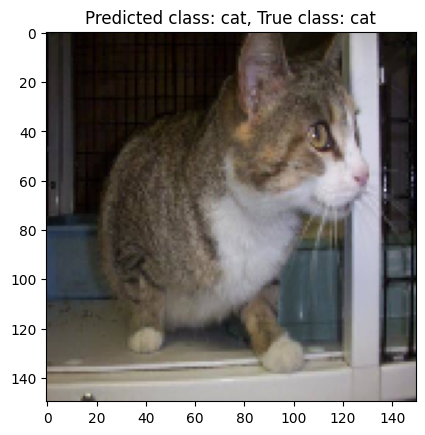

In [12]:
for i in range(len(x)): 
    plt.imshow(x[i]) 
    plt.title(f'Predicted class: {class_names[int(round(y_pred[i][0]))]}, True class: {class_names[int(y_true[i])]}') 
    plt.show() 

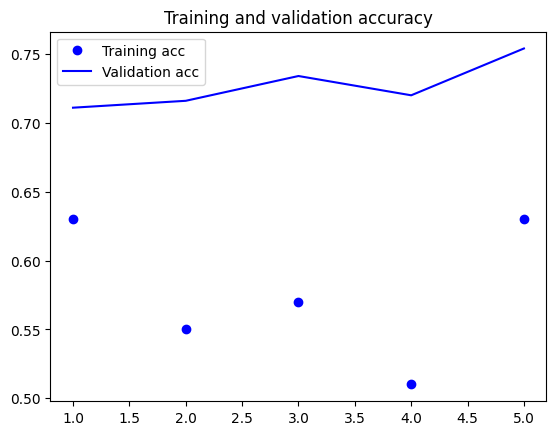

In [13]:
#Plot accuracy and loss over time 
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training acc") 
plt.plot(epochs, val_acc, "b", label = "Validation acc") 
plt.title("Training and validation accuracy") 
plt.legend()

plt.show() 